In [31]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix

In [32]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5419464795811388551
 xla_global_id: -1]

In [33]:
device_name = tf.test.gpu_device_name()
if len(device_name)>0:
    print(f'GPU has been found... device name is{device_name}')
else:
    print('No GPU has been found...')

No GPU has been found...


In [34]:
#load data(sometimes need to use "/")
df = pd.read_csv('/home/team_1/ann_demo/DNN_Multiclass_classificaiton_python_demo/Data/Stress.csv')
# Colab
#df = pd.read_csv('')
df

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


# 1. Quick overview to get a grasp of the data set

In [35]:
# Change data type
df.iloc[:,3]=df.iloc[:,3].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   object 
dtypes: float64(2), int64(1), object(1)
memory usage: 62.7+ KB


In [36]:
# 1.3 Add include='all' to select all columns
df.describe(include='all')

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,790
mean,20.000000,89.000000,100.141429,NaN
std,5.777833,5.777833,58.182948,NaN
min,10.000000,79.000000,0.000000,NaN
25%,15.000000,84.000000,50.000000,NaN
50%,20.000000,89.000000,101.000000,NaN
75%,25.000000,94.000000,150.000000,NaN


In [37]:
# 1.4 Using value_counts function to count frequency in categorical column
print(df.iloc[:,3].value_counts(sort=True))
print('+-----------------------+')

1    790
2    710
0    501
Name: Stress Level, dtype: int64
+-----------------------+


# 2. Data preprocessing

In [38]:
# Using pd.get_dummies function to generate dummies
dummied_df=pd.get_dummies(df,columns=['Stress Level'])
dummied_df

,Humidity,Temperature,Step count,Stress Level_0,Stress Level_1,Stress Level_2
0,21.33,90.33,123,0,1,0
1,21.41,90.41,93,0,1,0
2,27.12,96.12,196,0,0,1
3,27.64,96.64,177,0,0,1
4,10.87,79.87,87,1,0,0
...,...,...,...,...,...,...
1996,21.82,90.82,96,0,1,0
1997,10.45,79.45,45,1,0,0
1998,27.22,96.22,135,0,0,1
1999,12.46,81.46,64,1,0,0


In [39]:
# Convert Y into dummies
Y=dummied_df.iloc[:,[3,4,5]].copy()
dummied_Y=Y.to_numpy()
dummied_Y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

# 3. Data scaling with minimax technique

In [40]:
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=dummied_df.columns
scaled_data.head()

,Humidity,Temperature,Step count,Stress Level_0,Stress Level_1,Stress Level_2
0,0.5665,0.5665,0.615,0.0,1.0,0.0
1,0.5705,0.5705,0.465,0.0,1.0,0.0
2,0.8560,0.8560,0.980,0.0,0.0,1.0
3,0.8820,0.8820,0.885,0.0,0.0,1.0
4,0.0435,0.0435,0.435,1.0,0.0,0.0


# 4. Set  Independent variable(X) 

In [41]:
#set x (make prediction) with minimax
x=scaled_data.drop(['Stress Level_0','Stress Level_1','Stress Level_2'],axis=1).copy()
x

,Humidity,Temperature,Step count
0,0.5665,0.5665,0.615
1,0.5705,0.5705,0.465
2,0.8560,0.8560,0.980
3,0.8820,0.8820,0.885
4,0.0435,0.0435,0.435
...,...,...,...
1996,0.5910,0.5910,0.480
1997,0.0225,0.0225,0.225
1998,0.8610,0.8610,0.675
1999,0.1230,0.1230,0.320


# 5. Spilt the data into train & test set

In [42]:
#prepare dataset with scaling
#Split the data (split into 80% training data & 20% testing data) (lock seed)
x_train,x_test,y_train,y_test=train_test_split(x,dummied_Y,test_size=0.2,random_state=444)

In [43]:
print('training:',len(y_train))
print('+-----------------------+')
print('testing:',len(y_test))

training: 1600
+-----------------------+
testing: 401


# 6. Creating Net 

In [44]:
# Quick recap: Total of 12 features in the data set
x.head()

,Humidity,Temperature,Step count
0,0.5665,0.5665,0.615
1,0.5705,0.5705,0.465
2,0.8560,0.8560,0.980
3,0.8820,0.8820,0.885
4,0.0435,0.0435,0.435


In [45]:
# Tips: Using shape to call the amount of features in the data set 
input_features=x.shape[1]
print('Amount of features:',input_features)

Amount of features: 3


# Sequential style coding for creating net

Note: The following code demonstrate the most common style for creating net

In [46]:
# Some self define functions for building deep neural networks
def dense_generator(model_name,layers,last_layer_neurons,activation_fun='relu'):
    n=last_layer_neurons
    neurons=n
    for i in range(0,layers):
        neurons=neurons*2
        model_name.add(Dense(units=neurons, activation=activation_fun))

In [47]:
# with tf.device(device_name):
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=6, input_dim=3, activation='relu'))

# 6.3 Add 5 dense layers
dense_generator(model,5,6)

# 6.4 Add dropout layer
model.add(Dropout(rate=0.2))

# 6.5 Add 2 more dense layers
dense_generator(model,2,192)

# 6.6 Add regularization layer optional
#model.add(BatchNormalization())

# 6.7 Add output softmax layer
model.add(Dense(units=3, activation='softmax'))

# 6.8 Compile the defined Net
opt=Adam(learning_rate=0.001,beta_1=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dense_4 (Dense)             (None, 96)                4704      
                                                                 
 dense_5 (Dense)             (None, 192)               18624     
                                                                 
 dropout (Dropout)           (None, 192)               0

Note: Remember to clear the session or else some of the left neurans may cause trouble while fitting

# 7. Fit the model

# Note: The validation set should be split manually

In [48]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=24)

# 7.1 Store in the history for more useful information
history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
20/20 [==============================] - 2s 67ms/step - loss: 0.8938 - accuracy: 0.4844 - val_loss: 0.6005 - val_accuracy: 0.8188
Epoch 2/100
20/20 [==============================] - 1s 28ms/step - loss: 0.4046 - accuracy: 0.9078 - val_loss: 0.1546 - val_accuracy: 0.9656
Epoch 3/100
20/20 [==============================] - 1s 42ms/step - loss: 0.1220 - accuracy: 0.9508 - val_loss: 0.1337 - val_accuracy: 0.9344
Epoch 4/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0933 - accuracy: 0.9586 - val_loss: 0.1387 - val_accuracy: 0.9375
Epoch 5/100
20/20 [==============================] - 1s 30ms/step - loss: 0.1026 - accuracy: 0.9563 - val_loss: 0.0659 - val_accuracy: 0.9688
Epoch 6/100
20/20 [==============================] - 1s 40ms/step - loss: 0.0734 - accuracy: 0.9664 - val_loss: 0.0398 - val_accuracy: 0.9906
Epoch 7/100
20/20 [==============================] - 1s 30ms/step - loss: 0.0501 - accuracy: 0.9766 - val_loss: 0.0252 - val_accuracy: 0.9969
Epoch 

In [49]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

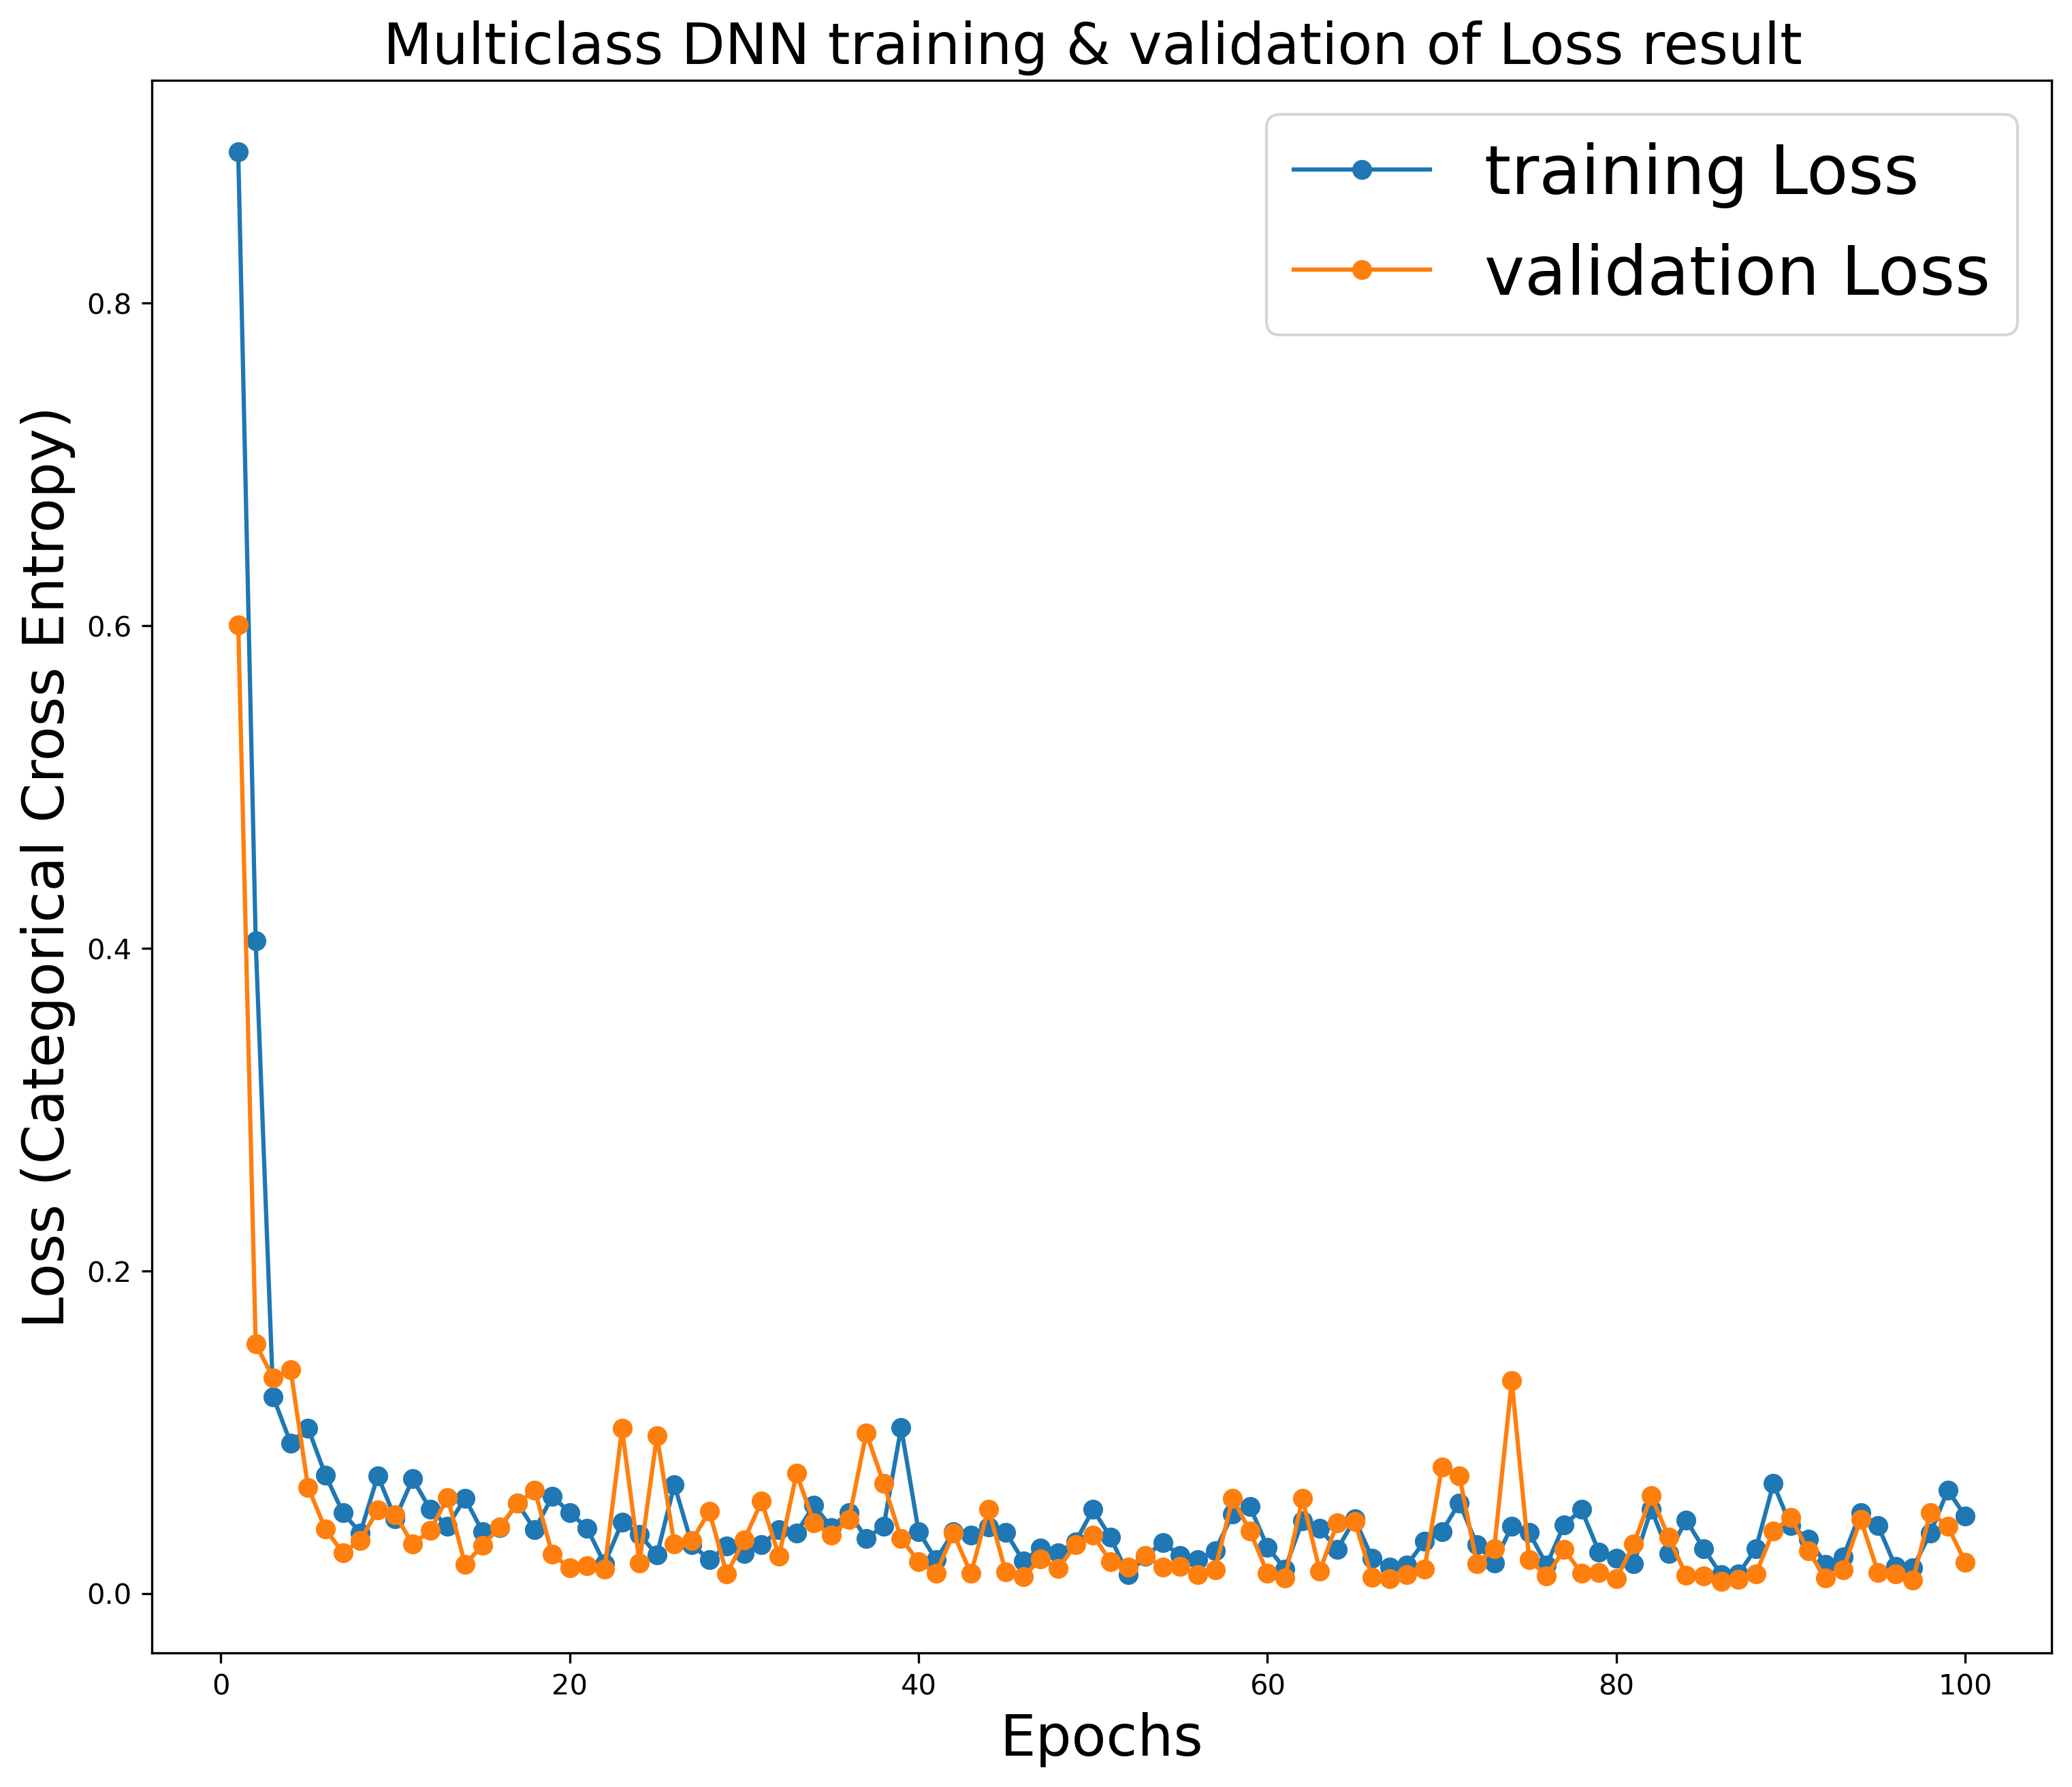

In [50]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Categorical Cross Entropy)',fontsize=20)
plt.title('Multiclass DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

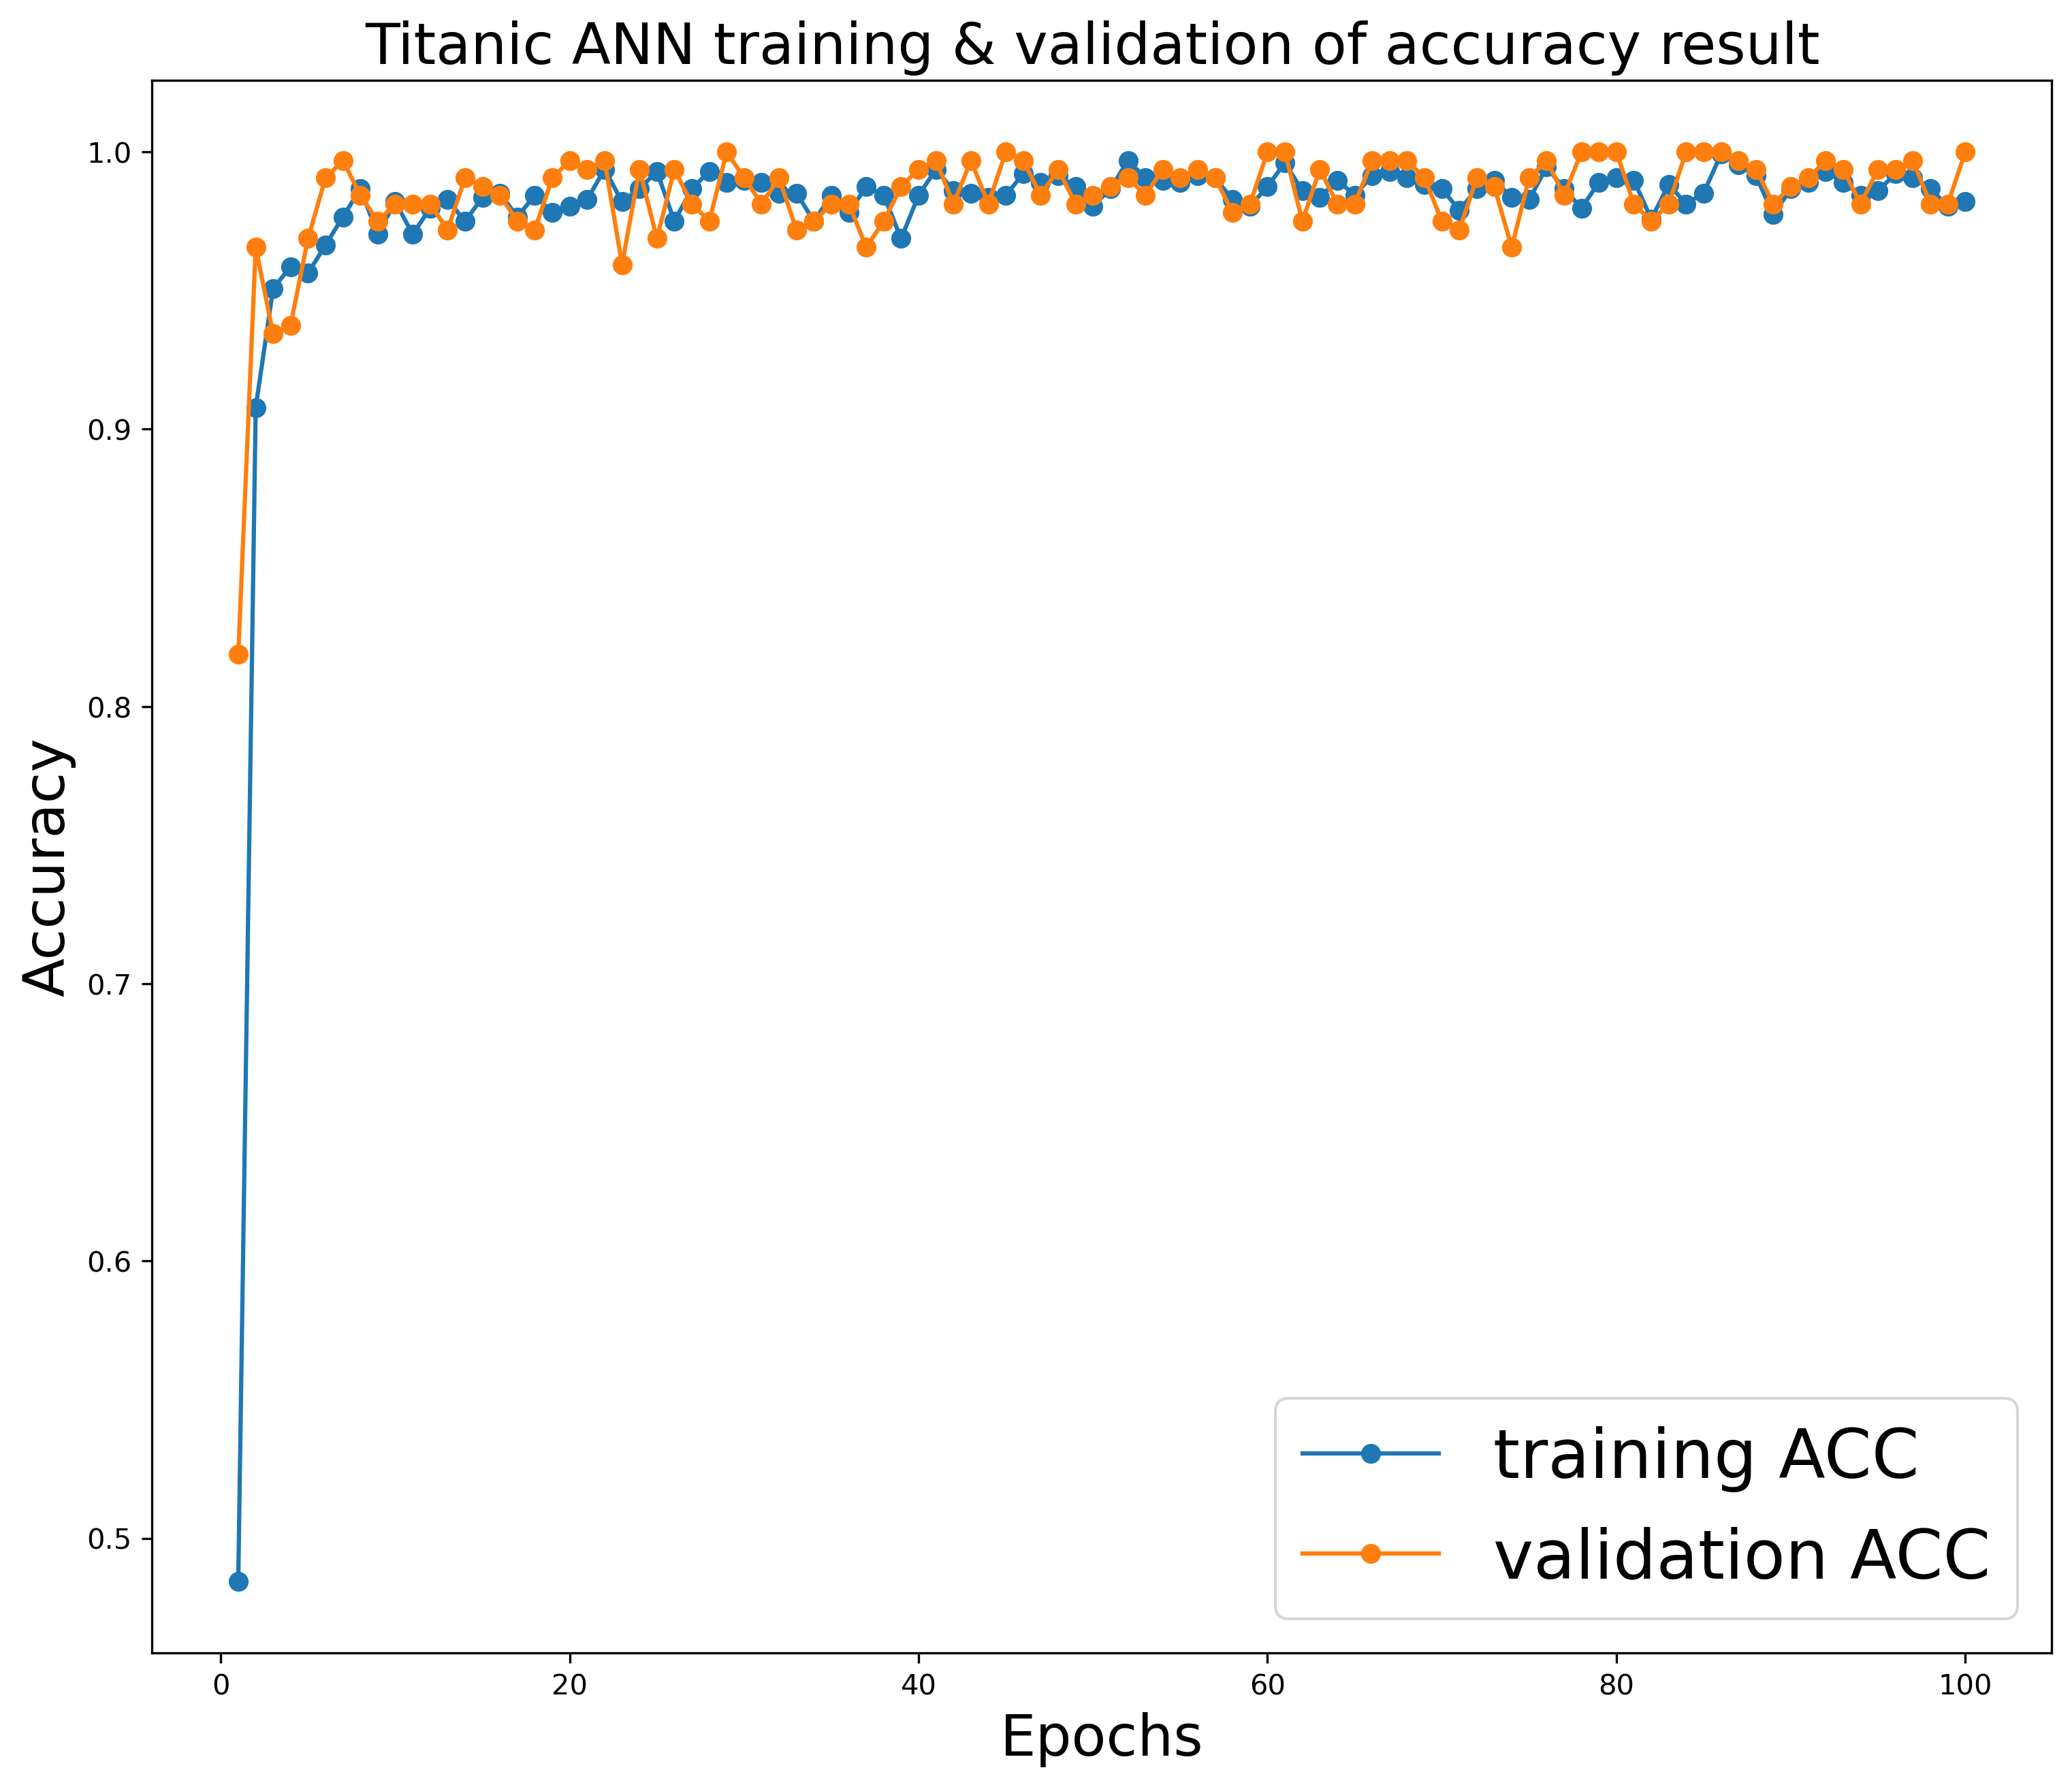

In [51]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [52]:
# 7.3 Save the trained model
model.save('./Multiclass_ANN_trained_model.h5')
# Colab
#model.save('titanic_ANN_trained_model.h5')
print('Model has been saved...')

Model has been saved...


In [53]:
# 7.4 Restore the saved model for testing
ANN_model=keras.models.load_model('./Multiclass_ANN_trained_model.h5')
# Colab
#ANN_model=keras.models.load_model('')
print('Model successfully loaded...')

Model successfully loaded...


# 8. Testing

In [54]:
# 8.1 Make prediction 
prediction=ANN_model.predict_on_batch(x_test)
prediction

array([[6.7158192e-01, 3.2229975e-01, 6.1183632e-03],
       [7.6705621e-12, 5.2614337e-06, 9.9999475e-01],
       [2.1461988e-06, 5.1849578e-03, 9.9481297e-01],
       ...,
       [1.0000000e+00, 6.7255749e-24, 0.0000000e+00],
       [3.3515058e-05, 3.1146619e-02, 9.6881986e-01],
       [1.0909759e-03, 9.9743301e-01, 1.4760087e-03]], dtype=float32)

In [55]:
df_prediction=pd.DataFrame(prediction)
df_prediction.columns=['Stress level 0','Stress level 1','Stress level 2']
df_prediction

,Stress level 0,Stress level 1,Stress level 2
0,6.715819e-01,3.222997e-01,6.118363e-03
1,7.670562e-12,5.261434e-06,9.999948e-01
2,2.146199e-06,5.184958e-03,9.948130e-01
3,1.001587e-03,9.394846e-01,5.951382e-02
4,1.998540e-03,9.975657e-01,4.357607e-04
...,...,...,...
396,1.000000e+00,6.839623e-09,1.203286e-20
397,7.175871e-11,1.731167e-05,9.999827e-01
398,1.000000e+00,6.725575e-24,0.000000e+00
399,3.351506e-05,3.114662e-02,9.688199e-01


In [56]:
# Convert each sample final prediction according to the class with the largest likelihood
final_prediction=[]
for i in range(0,len(prediction)):
    origin=prediction[i]
    max_idx=np.argmax(origin)
    convert=np.zeros_like(origin)
    convert[max_idx]=1
    final_prediction.append(convert)

In [57]:
df_final_prediction=pd.DataFrame(final_prediction)
df_final_prediction.columns=['Stress level 0','Stress level 1','Stress level 2']
df_final_prediction=df_final_prediction.astype(int)
df_final_prediction

,Stress level 0,Stress level 1,Stress level 2
0,1,0,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
396,1,0,0
397,0,0,1
398,1,0,0
399,0,0,1


In [58]:
fpred=df_final_prediction.to_numpy()
reverted = np.argmax(fpred, axis=1)
reverted

array([0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2,
       2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0,
       1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0,
       1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2,

In [59]:
y_test_reverted=np.argmax(y_test, axis=1)
y_test_reverted

array([0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2,
       2, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0,
       1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0,
       1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2,

In [60]:
# Calculating the mertics at once
testing_acc=accuracy_score(y_test,fpred)
testing_f1s=f1_score(y_test,fpred,average=None)
testing_pre=precision_score(y_test,fpred,average=None)
testing_sen=recall_score(y_test,fpred,average=None)
testing_cm=confusion_matrix(y_test_reverted,reverted)
print('Testing result:')
print('Testing ACC:',testing_acc)
print('Testing f1s:',testing_f1s)
print('Testing pre:',testing_pre)
print('Testing sen:',testing_sen)
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 0.9950124688279302
Testing f1s: [0.98850575 0.99435028 1.        ]
Testing pre: [1.         0.98876404 1.        ]
Testing sen: [0.97727273 1.         1.        ]

Testing confusion matrix:
[[ 86   2   0]
 [  0 176   0]
 [  0   0 137]]
